## IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## READING DATASET

In [2]:
data= pd.read_csv("/home/sainath/Downloads/multi-reg/data.csv")
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


## DATA EXPLORATORY ANALYSIS

In [3]:
 #VARIABLES IENTIFICATION:data.dtypes or data.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [4]:
#dropping columns
data=data.drop(['country'],axis=1)

In [6]:
data=data.drop(['date'],axis=1)

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


## ENCODING FOR CONVERTING OBJECT DATATYPE

###### MEAN ENCODING AS THE VARIABLES COUNT IS MORE. TO PREVENT MORE COLUMNS OR DIMENALITY CURSE

In [8]:
data.groupby(['street'])['price'].count()

street
1 View Ln NE           1
10 W Etruria St        1
100 20th Ave E         1
100 24th Ave E         1
100 Mt Si Pl NW        1
                      ..
Shangri-La Way NW      1
Sunrise Loop Trail     1
Tolt Pipeline Trail    1
Trossachs Blvd SE      1
Valley View Trail      1
Name: price, Length: 4525, dtype: int64

In [9]:
data.groupby(['street'])['price'].mean()

street
1 View Ln NE           309620.0
10 W Etruria St        625000.0
100 20th Ave E         600000.0
100 24th Ave E         460000.0
100 Mt Si Pl NW        575000.0
                         ...   
Shangri-La Way NW      627000.0
Sunrise Loop Trail     754800.0
Tolt Pipeline Trail    435000.0
Trossachs Blvd SE      735000.0
Valley View Trail      693000.0
Name: price, Length: 4525, dtype: float64

In [10]:
mean = data.groupby(['street'])['price'].mean().to_dict()
data['street']=data['street'].map(mean)

In [11]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05,Shoreline,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06,Seattle,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05,Kent,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05,Bellevue,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05,Redmond,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05,Seattle,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05,Bellevue,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05,Renton,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05,Seattle,WA 98178


In [12]:
data.groupby(['city'])['price'].count()

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [14]:
data.groupby(['city'])['price'].mean()

city
Algona                 2.072880e+05
Auburn                 2.993404e+05
Beaux Arts Village     7.450000e+05
Bellevue               8.471807e+05
Black Diamond          3.396056e+05
Bothell                4.814419e+05
Burien                 3.489472e+05
Carnation              5.087520e+05
Clyde Hill             1.321945e+06
Covington              2.962304e+05
Des Moines             3.049925e+05
Duvall                 4.039941e+05
Enumclaw               3.076146e+05
Fall City              6.926818e+05
Federal Way            2.898877e+05
Inglewood-Finn Hill    4.250000e+05
Issaquah               5.961637e+05
Kenmore                4.474940e+05
Kent                   4.394924e+05
Kirkland               6.515836e+05
Lake Forest Park       4.484750e+05
Maple Valley           3.364749e+05
Medina                 2.046559e+06
Mercer Island          1.123818e+06
Milton                 2.850000e+05
Newcastle              6.660467e+05
Normandy Park          5.067931e+05
North Bend             

In [16]:
mean = data.groupby(['city'])['price'].mean().to_dict()
data['city']=data['city'].map(mean)

In [17]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05,420392.364047,WA 98133
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06,579837.467282,WA 98119
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05,439492.444648,WA 98042
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05,847180.662995,WA 98008
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05,667649.534781,WA 98052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05,579837.467282,WA 98133
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05,847180.662995,WA 98007
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05,377040.966329,WA 98059
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05,579837.467282,WA 98178


In [18]:
data.groupby(['statezip'])['price'].count()
data.groupby(['statezip'])['price'].mean()
mean = data.groupby(['statezip'])['price'].mean().to_dict()
data['statezip']=data['statezip'].map(mean)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05,420392.364047,374433.232975
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06,579837.467282,914441.496599
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05,439492.444648,320243.968571
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05,847180.662995,602963.100000
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05,667649.534781,637555.719367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05,579837.467282,374433.232975
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05,847180.662995,639103.418803
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05,377040.966329,499455.770108
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05,579837.467282,263912.457483


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   float64
 14  city           4600 non-null   float64
 15  statezip       4600 non-null   float64
dtypes: float64(7), int64(9)
memory usage: 575.1 KB


In [20]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
dtype: int64

<AxesSubplot:xlabel='city'>

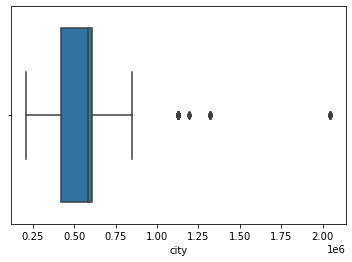

In [22]:
sns.boxplot(data.city)

In [24]:
from scipy import stats
z = np.abs(stats.zscore(data))

In [25]:
data_clean = data[(z<3).all(axis=1)]

In [26]:
data_clean.shape

(4109, 16)

## BUILDING MULTIPLE-REGRESSION MODEL

In [27]:
x=data.drop(['price'],axis=1)
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,3.130000e+05,420392.364047,374433.232975
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2.384000e+06,579837.467282,914441.496599
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,3.420000e+05,439492.444648,320243.968571
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4.200000e+05,847180.662995,602963.100000
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5.500000e+05,667649.534781,637555.719367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,3.081667e+05,579837.467282,374433.232975
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,5.343333e+05,847180.662995,639103.418803
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,4.169042e+05,377040.966329,499455.770108
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,2.034000e+05,579837.467282,263912.457483


In [28]:
y=data.price
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [29]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [30]:
reg.coef_

array([ 1.48038897e+02, -2.83201897e+03,  3.05368127e+00, -1.62968733e-02,
        1.08269729e+03,  1.60422268e+04, -3.06687148e+02, -1.13448724e+03,
        2.24411757e+00,  8.09563572e-01, -1.43599282e+01, -1.08504186e+00,
        9.97655756e-01,  9.96659367e-05, -2.09749183e-03])

In [31]:
reg.intercept_

28783.876022158598